In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Read in data set, explore

In [28]:
# Load the processed data

df_med = pd.read_csv('../med_data1.csv')

In [29]:
df_med.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,ReAdmin,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,cd86e3b5-bccb-4c38-b406-a70859af6424,1b827d78c02cdf967d83280a316fbab7,19610,40.34008,-75.97606,Reading,PA,15439,Berks,Suburban,America/New_York,"Production assistant, radio",1,79,Regular High School Diploma,Student,83147.66,Divorced,Snow,Discover,No,Female,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,95.018175,1034.377162,0,1,0,4,1,2,2,4
1,2,Z919181,7058d104-99d4-41ae-ad17-def063f2024c,e3d31d932fe4468908664f2b054fa31c,66080,38.40441,-95.25956,Richmond,KS,922,Franklin,Urban,America/Chicago,Retail buyer,2,31,"Some College, 1 or More Years, No Degree",Full Time,54612.56,Divorced,PaleGoldenRod,Mastercard,Yes,Male,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,97.442069,1497.764653,3,4,3,3,2,4,1,3
2,3,F995323,4c1a465a-2a2b-4f38-bbe6-036fac234eaa,2644b097b08b5548313266f100a6e22c,45653,38.89156,-82.82310,Minford,OH,3782,Scioto,Urban,America/New_York,Forensic scientist,7,49,"Some College, 1 or More Years, No Degree",Student,7726.42,Married,WhiteSmoke,VISA 16 digit,Yes,Male,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,82.496547,395.125825,3,1,2,3,2,2,3,4


In [6]:
#df_med.describe()
#df_med.dtypes

In [30]:
# Define features and target variables

X = df_med.drop('TotalCharge',axis=1)   #Feature Matrix
Y = df_med['TotalCharge']          #Target Variable

# Print dimensions
print(X.shape)
print(Y.shape)

(10000, 49)
(10000,)


# Feature Engineering

count    10000.000000
mean      3186.529510
std       2455.029985
min        -23.335263
25%        727.690260
50%       3119.102230
75%       5572.629376
max       8086.880982
Name: TotalCharge, dtype: float64


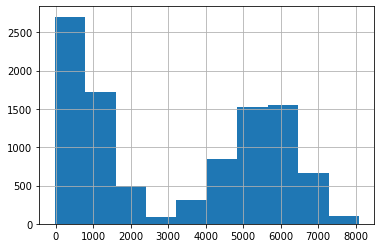

In [31]:
# Summary of Y variable
print(Y.describe())
Y.hist()

In [32]:
# X columns

# Continuous cols (to normalize-for KNN)

cols_cont = ['Population', 'Children', 'Income', 'Age', 'Initial_Days', 'MonthlyCharge']

# Lat/Long cols
cols_lat_long = ['Lat', 'Lng']

# Yes/No cols Transform  to 0/1
cols_yes_no = ['ReAdmin', 'SeniorCitizen', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

for col in cols_yes_no:
    X[col] = np.where(X[col]=='Yes',1,0)
    
# Categorical cols (create dummies)
cols_cat = ['Area', 'Gender', 'Education', 'Employment', 'Marital', 'Initial_Admin', 'Complication_Risk', 'Services'] #no Credit_card
#cols_cat = ['Area', 'Gender', 'Employment', 'Education', 'Marital', 'Credit_card', 'Contract', 'InternetService', 'PaymentMethod']

In [33]:
# Combine non-Cat cols

X_noncat = X[cols_cont + cols_lat_long + cols_yes_no]
X_noncat.head(3)

,Population,Children,Income,Age,Initial_Days,MonthlyCharge,Lat,Lng,ReAdmin,SeniorCitizen,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,15439,1,83147.66,79,10.585770,95.018175,40.34008,-75.97606,0,0,1,0,0,1,1,0,1,1,1,0,1
1,922,2,54612.56,31,15.129562,97.442069,38.40441,-95.25956,1,0,1,0,1,0,0,0,0,0,0,1,0
2,3782,7,7726.42,49,4.772177,82.496547,38.89156,-82.82310,1,0,1,0,1,0,1,0,0,0,0,0,0


In [11]:
# Create dummies-categorical cols

X_cat = pd.get_dummies(X[cols_cat], drop_first=True)

In [12]:
# Join Cat and Noncat together

X_all = pd.concat([X_noncat, X_cat],axis=1)
X_all.head()

,Population,Children,Income,Age,Initial_Days,MonthlyCharge,Lat,Lng,ReAdmin,SeniorCitizen,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Area_Suburban,Area_Urban,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Complication_Risk_Low,Complication_Risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
0,15439,1,83147.66,79,10.585770,95.018175,40.34008,-75.97606,0,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,922,2,54612.56,31,15.129562,97.442069,38.40441,-95.25956,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3782,7,7726.42,49,4.772177,82.496547,38.89156,-82.82310,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,1115,0,57779.93,31,1.714879,87.471303,39.88561,-90.39943,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,17445,0,70179.69,50,1.254807,87.458638,40.63710,-103.23146,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


# Train/Test Split Data

In [13]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, Y,
    test_size=0.3,
    random_state=1
)

In [14]:
# Print dimensions

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 50)
(3000, 50)
(7000,)
(3000,)


# Predictive Modeling Techniques

# 1. KNN

This section covers KNN

In [15]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsRegressor

# Load the metrics libraries
from sklearn.metrics import mean_squared_error

In [16]:
# Scale the data for cols_cont 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #MinMaxScaler()

X_train_std = X_train.copy() #copy train features df for KNN
X_test_std = X_test.copy()  #copy test features df for KNN
X_train_std[cols_cont] = scaler.fit_transform(X_train_std[cols_cont]) 
X_test_std[cols_cont] = scaler.transform(X_test_std[cols_cont])

X_train_std.head(3)

,Population,Children,Income,Age,Initial_Days,MonthlyCharge,Lat,Lng,ReAdmin,SeniorCitizen,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Area_Suburban,Area_Urban,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Complication_Risk_Low,Complication_Risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
2228,-0.072058,1.320128,-1.194997,1.092357,-1.010361,-0.007544,33.66116,-94.15639,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
5910,0.822813,0.395900,-0.561450,1.236218,1.123644,-0.349679,36.16602,-116.00381,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1950,-0.574062,0.395900,-0.864709,1.188264,-0.911589,-0.350225,41.22683,-89.30943,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0


In [17]:
# Train a K-Nearest Neighbors model

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [18]:
# Print overall test-set accuracy, precision, recall
y_pred = knn.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('RMSE value is:', error)

RMSE value is: 2618.3216271208607


# 2. Decision Tree

This section covers Decision Trees

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
# Train a Random Forest

tree = DecisionTreeRegressor(max_depth=5)

tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
# Print overall test-set accuracy, precision, recall
y_pred = tree.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('RMSE value is:', error)

RMSE value is: 188.9452754808665


# 3. Random Forest 

This section covers Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Train a Random Forest

forest = RandomForestRegressor(
    n_estimators=100,
    max_features=18,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=18, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [24]:
# Print overall test-set accuracy, precision, recall
y_pred = forest.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('RMSE value is:', error)

RMSE value is: 461.78538462755984


## Feature Importance for Random Forest

In [25]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

Initial_Days                0.931992
ReAdmin                     0.042506
MonthlyCharge               0.012296
Complication_Risk_Medium    0.001855
Population                  0.001530
Income                      0.001370
Lat                         0.001321
Lng                         0.001310
Reflux_esophagitis          0.001018
Age                         0.000611
dtype: float64

No handles with labels found to put in legend.


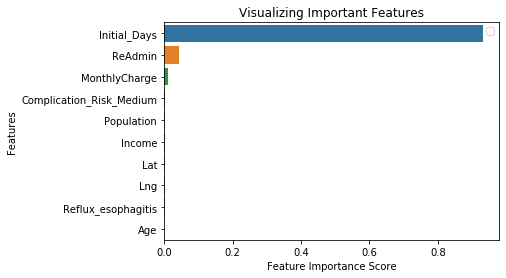

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()